# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nurani Istiaen
- **Email:** n.istiaen1705@gmail.com / mc459d5x2107@student.devacademy.id
- **ID Dicoding:** MC459D5X2107

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi pelanggan berdasarkan wilayah?
- Bagaimana tren penjualan dari waktu ke waktu, dan kapan terjadi puncak penjualan?
- Apa metode pembayaran yang paling sering digunakan oleh pelanggan?
- 10 Kategori produk apa yang memiliki jumlah penjualan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel dan menampilkan 5 baris pertama dari DataFrame.

In [2]:
customers = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/customers_dataset.csv')
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [3]:
order_items = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/order_items_dataset.csv')
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [4]:
order_payments = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/order_payments_dataset.csv')
order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [5]:
order_reviews = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/order_reviews_dataset.csv')
order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [6]:
orders = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/orders_dataset.csv')
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [7]:
product_category_name = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/product_category_name_translation.csv')
product_category_name.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [8]:
products = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/products_dataset.csv')
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [9]:
sellers = pd.read_csv('https://raw.githubusercontent.com/Nuraniisti/Proyek_Analisis_Data/refs/heads/main/E-Commerce%20Public%20Dataset/sellers_dataset.csv')
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


### Assessing Data

Mengecek tipe data, missing values, dan data duplikat.

In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [12]:
customers.duplicated().sum()

np.int64(0)

In [13]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
order_items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [15]:
order_items.duplicated().sum()

np.int64(0)

In [16]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [17]:
order_payments.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [18]:
order_payments.duplicated().sum()

np.int64(0)

In [19]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [21]:
order_reviews.duplicated().sum()

np.int64(0)

In [22]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [24]:
orders.duplicated().sum()

np.int64(0)

In [25]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [26]:
product_category_name.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [27]:
product_category_name.duplicated().sum()

np.int64(0)

In [28]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [29]:
products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [30]:
products.duplicated().sum()

np.int64(0)

In [31]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [32]:
sellers.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [33]:
sellers.duplicated().sum()

np.int64(0)

**Insight:**
- Menunjukkan adanya missing values pada dataset **order_reviews**, **orders** dan **products**.
- Tidak ada duplikasi data pada setiap dataset.

### Cleaning Data

Menangani missing values dengan cara menghapus baris yang memiliki missing values pada order_reviews, orders dan products. Setelah itu, menghitung jumlah baris data setelah proses penghapusan.

In [34]:
order_reviews = order_reviews.dropna()
order_reviews.count()

,0
review_id,9839
order_id,9839
review_score,9839
review_comment_title,9839
review_comment_message,9839
review_creation_date,9839
review_answer_timestamp,9839


In [35]:
orders = orders.dropna()
orders.count()

,0
order_id,96461
customer_id,96461
order_status,96461
order_purchase_timestamp,96461
order_approved_at,96461
order_delivered_carrier_date,96461
order_delivered_customer_date,96461
order_estimated_delivery_date,96461


In [36]:
products = products.dropna()
products.count()

,0
product_id,32340
product_category_name,32340
product_name_lenght,32340
product_description_lenght,32340
product_photos_qty,32340
product_weight_g,32340
product_length_cm,32340
product_height_cm,32340
product_width_cm,32340


Menggabungkan dataset products dan product_category_name sebelum digabung kembali dengan dataset lainnya.

In [37]:
products = pd.merge(products, product_category_name, on='product_category_name', how='left')

Menggabungkan beberapa dataset menjadi satu dataframe df.

In [38]:
df = pd.merge(orders, customers, on='customer_id')
df = df.merge(order_items, on='order_id')
df = df.merge(order_payments, on='order_id')
df = df.merge(products, on='product_id')
df = df.merge(sellers, on='seller_id')
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


Mengkonversi waktu dan membuat kolom turunan.

In [39]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_purchase_year'] = df['order_purchase_timestamp'].dt.year
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.month
df['order_purchase_day'] = df['order_purchase_timestamp'].dt.day
df['order_purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['period'] = df['order_purchase_timestamp'].dt.to_period('M').astype(str)

In [40]:
print(df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'order_purchase_year',
       'order_purchase_month', 'order_purchase_day', 'order_purchase_hour',
       'period'],
      dtype='object')


## Exploratory Data Analysis (EDA)

### Explore ...

Melihat informasi statistik dari dataframe df.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113390 entries, 0 to 113389
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113390 non-null  object        
 1   customer_id                    113390 non-null  object        
 2   order_status                   113390 non-null  object        
 3   order_purchase_timestamp       113390 non-null  datetime64[ns]
 4   order_approved_at              113390 non-null  object        
 5   order_delivered_carrier_date   113390 non-null  object        
 6   order_delivered_customer_date  113390 non-null  object        
 7   order_estimated_delivery_date  113390 non-null  object        
 8   customer_unique_id             113390 non-null  object        
 9   customer_zip_code_prefix       113390 non-null  int64         
 10  customer_city                  113390 non-null  object        
 11  

In [42]:
df.describe()

,order_purchase_timestamp,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
count,113390,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000,113390.000000
mean,2018-01-01 14:31:24.769009664,35080.723027,1.196843,120.184057,20.023985,1.089937,2.942367,172.241850,48.801755,785.793059,2.209375,2110.641917,30.281665,16.618635,23.099427,24510.930117,2017.542588,6.038566,15.555058,14.763621
min,2016-10-03 09:44:50,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,2016.000000,1.000000,1.000000,0.000000
25%,2017-09-13 19:39:29.750000128,11320.000000,1.000000,39.900000,13.080000,1.000000,1.000000,61.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,2017.000000,3.000000,8.000000,11.000000
50%,2018-01-20 15:47:45,24325.000000,1.000000,74.900000,16.320000,1.000000,2.000000,108.140000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,2018.000000,6.000000,16.000000,15.000000
75%,2018-05-05 18:14:42,58768.750000,1.000000,133.732500,21.200000,1.000000,4.000000,189.370000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28495.000000,2018.000000,8.000000,23.000000,19.000000
max,2018-08-29 15:00:37,99980.000000,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,2018.000000,12.000000,31.000000,23.000000
std,NaN,29844.853275,0.701270,182.761548,15.752500,0.682057,2.777802,266.596347,10.018253,650.986313,1.720293,3770.379971,16.160708,13.447915,11.740315,27636.230916,0.504081,3.221380,8.666251,5.326934


Melihat jumlah dan persentase status order.

In [43]:
order_status_counts = df['order_status'].value_counts()
order_status_percentage = df['order_status'].value_counts(normalize=True) * 100

order_status_df = pd.DataFrame({'Jumlah': order_status_counts, 'Persentase (%)': order_status_percentage})
print(order_status_df)

              Jumlah  Persentase (%)
order_status                        
delivered     113383       99.993827
canceled           7        0.006173


Menghitung jumlah customer dan order.

In [44]:
all_customers = customers['customer_unique_id'].nunique()
all_orders = orders.order_id.nunique()
print("Jumlah Pelanggan:", all_customers)
print("Jumlah Pesanan:   ", all_orders)

Jumlah Pelanggan: 96096
Jumlah Pesanan:    96461


Distribusi customer per wilayah.

In [45]:
customer_state = customers[['customer_unique_id', 'customer_state']]
customer_state = customer_state.groupby('customer_state')['customer_unique_id'].nunique().reset_index()
customer_state = customer_state.sort_values(by='customer_unique_id', ascending=False)
customer_state.rename(columns={'customer_unique_id': 'jumlah_pelanggan'}, inplace=True)
print(customer_state.head())

   customer_state  jumlah_pelanggan
25             SP             40302
18             RJ             12384
10             MG             11259
22             RS              5277
17             PR              4882


Melihat jumlah order per bulan setiap tahunnya.

In [46]:
monthly_orders = df[['order_id', 'order_purchase_year', 'order_purchase_month']]
monthly_orders = monthly_orders.groupby(['order_purchase_year', 'order_purchase_month'])['order_id'].nunique().reset_index()
monthly_orders.rename(columns={'order_id': 'jumlah_order'}, inplace=True)
monthly_orders['period'] = monthly_orders['order_purchase_month'].astype(str) + "/" + monthly_orders['order_purchase_year'].astype(str)
monthly_orders = monthly_orders.sort_values(by=['order_purchase_year', 'order_purchase_month'])
print(monthly_orders.head)

<bound method NDFrame.head of     order_purchase_year  order_purchase_month  jumlah_order   period
0                  2016                    10           268  10/2016
1                  2016                    12             1  12/2016
2                  2017                     1           737   1/2017
3                  2017                     2          1592   2/2017
4                  2017                     3          2496   3/2017
5                  2017                     4          2243   4/2017
6                  2017                     5          3466   5/2017
7                  2017                     6          3085   6/2017
8                  2017                     7          3824   7/2017
9                  2017                     8          4129   8/2017
10                 2017                     9          4090   9/2017
11                 2017                    10          4428  10/2017
12                 2017                    11          7186  11/2017
13  

Melihat jumlah order per tahunnya.

In [47]:
yearly_orders = df.groupby('order_purchase_year')['order_id'].nunique().reset_index()
yearly_orders.rename(columns={'order_id': 'jumlah_order'}, inplace=True)
yearly_orders = yearly_orders.sort_values(by='order_purchase_year')
print(yearly_orders)

   order_purchase_year  jumlah_order
0                 2016           269
1                 2017         42659
2                 2018         52200


Melihat rata-rata pembayaran dari tiap metode pembayaran dan banyaknya pelanggan yang menggunakan metode pembayaran tertentu.

In [48]:
payment_method = order_payments.groupby("payment_type").agg({"payment_value": "mean", "order_id": "nunique"}).reset_index()
payment_method.rename(columns={"order_id": "jumlah_order"}, inplace=True)
payment_method = payment_method.sort_values(by="jumlah_order", ascending=False)
print(payment_method)

  payment_type  payment_value  jumlah_order
1  credit_card     163.319021         76505
0       boleto     145.034435         19784
4      voucher      65.703354          3866
2   debit_card     142.570170          1528
3  not_defined       0.000000             3


Menampilkan 10 kategori produk yang paling laris berdasarkan jumlah item yang terjual.

In [49]:
top_categories = df[['product_category_name_english', 'order_item_id']]
top_categories = top_categories.groupby(['product_category_name_english']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories.rename(columns={"product_category_name_english": "product_category"}, inplace=True)
top_categories[:10]

,product_category,order_item_id
0,bed_bath_table,14347
1,furniture_decor,11800
2,health_beauty,11189
3,sports_leisure,10041
4,computers_accessories,9960
5,housewares,9296
6,watches_gifts,6670
7,garden_tools,5995
8,telephony,5216
9,auto,4932


**Insight:**
- Jumlah customers ada sebanyak **96.096** dan jumlah orders ada sebanyak **96.461.**
- Customer paling banyak mengunakan tipe transaksi credit card. Tipe transaksi credit card juga memiliki rata-rata pembayaran paling tinggi.
- **Bed Bath Table** merupakan produk dengan order terbanyak yaitu (14.347) item, disusul oleh **Furniture Decor** (11.800) dan **Health Beauty** (11.189). Menunjukkan bahwa kebutuhan rumah tangga, dekorasi, dan produk kesehatan memiliki popularitas tinggi dalam pesanan.
- **Sao Paulo** merupakan wilayah dengan customer terbanyak.
- Persentase layanan pengiriman mencapai angka **99,99%** yang artinya risiko pembatalan pesanan sangat kecil.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana distribusi pelanggan berdasarkan wilayah?

<ipython-input-50-8cc4fe62a918>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_state, x='customer_state', y='jumlah_pelanggan', palette='Blues_r')


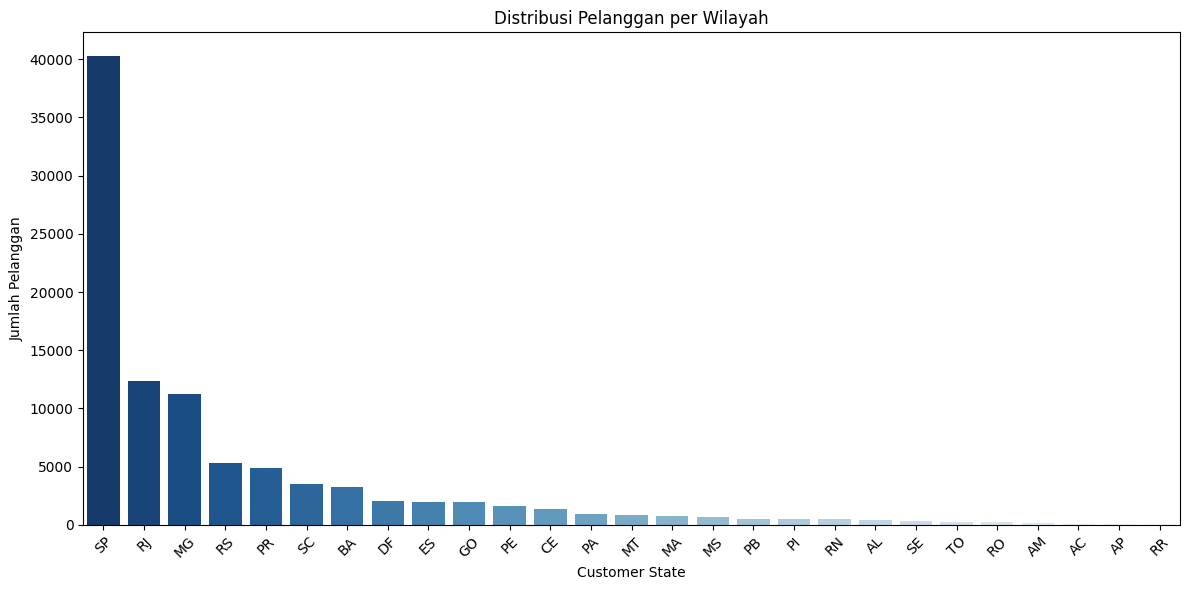

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=customer_state, x='customer_state', y='jumlah_pelanggan', palette='Blues_r')
plt.title("Distribusi Pelanggan per Wilayah")
plt.xlabel("Customer State")
plt.ylabel("Jumlah Pelanggan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kota Sao Paulo (SP) merupakan wilayah dengan pelanggan terbanyak, kemuadian wilayah Rio de Janeiro (RJ) di posisi ke dua, Minas Gerais (MG) di posisi ke tiga, Rio Grande do Sul (RS), Parana (PR) dan seterusnya. Menunjukkan bahwa sebagian besar pelanggan e-commerce berasal dari daerah perkotaan besar dan pusat ekonomi utama di Brasil.

Dengan mengetahui distribusi pelanggan berdasarkan wilayah, strategi pemasaran dapat dioptimalkan. Dengan mengetahui daerah dengan pelanggan dan order terbanyak, perusahaan dapat memperbaiki sistem distribusi dan memfokuskan promosi pada wilayah dengan jumlah customer tinggi untuk meningkatkan engagement.

### Pertanyaan 2:
- Bagaimana tren penjualan dari waktu ke waktu, dan kapan terjadi puncak penjualan?

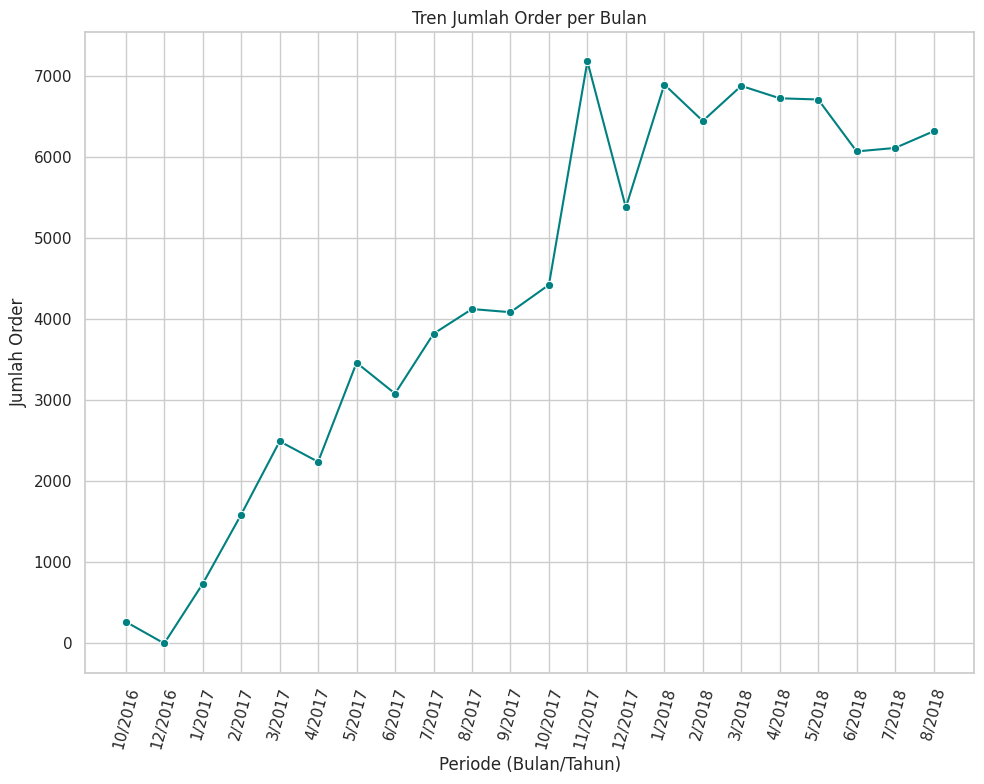

In [51]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
sns.lineplot(data=monthly_orders, x='period', y='jumlah_order', marker='o', color='teal')
plt.xticks(rotation=75)
plt.title("Tren Jumlah Order per Bulan")
plt.xlabel("Periode (Bulan/Tahun)")
plt.ylabel("Jumlah Order")
plt.tight_layout()
plt.show()

Dari tahun 2016 hingga 2018, angka penjualan terlihat naik dengan puncak order paling banyak terjadi pada bulan 11 tahun 2017. setelahnya angka penjualan cenderung stabil.
Dari tahun 2016 hingga 2018, angka penjualan mengalami tren kenaikan yang signifikan, dengan puncak jumlah order tertinggi terjadi pada bulan November 2017. Setelahnya, angka penjualan cenderung stabil, menunjukkan adanya keseimbangan dalam permintaan pasar.

##Pertanyaan 3:
- Apa metode pembayaran yang paling sering digunakan oleh pelanggan.

<ipython-input-52-62574f27bbe9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_method, x="payment_type", y="jumlah_order", palette=colors)
<ipython-input-52-62574f27bbe9>:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=payment_method, x="payment_type", y="jumlah_order", palette=colors)


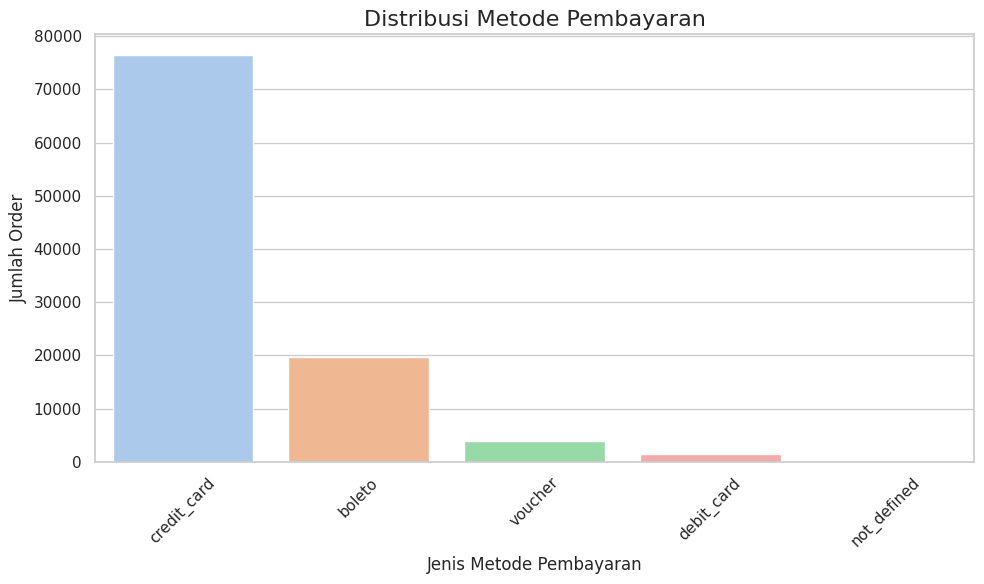

In [52]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")
sns.barplot(data=payment_method, x="payment_type", y="jumlah_order", palette=colors)
plt.title("Distribusi Metode Pembayaran", fontsize=16)
plt.xlabel("Jenis Metode Pembayaran", fontsize=12)
plt.ylabel("Jumlah Order", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mayoritas pelanggan menggunakan credit card sebagai metode pembayaran, dengan mencapai 76.505 kali pembayaran, menggunakan boleto dengan 19.784 kali pembayaran, kemudian voucher 3.866 pembayaran, debit_card 1.528 pembayaran dan not_defined atau tidak terdefinisi 3 pembayran.  
Pelanggan lebih memilih kemudahan dan fleksibilitas pembayaran dengan credit card dibandingkan metode lainnya. Hal ini bisa menjadi pertimbangan bagi strategi bisnis dalam menawarkan promo atau fasilitas tambahan bagi pengguna credit card.

##Pertanyaan 4:
- 10 Kategori produk apa yang memiliki jumlah penjualan tertinggi?

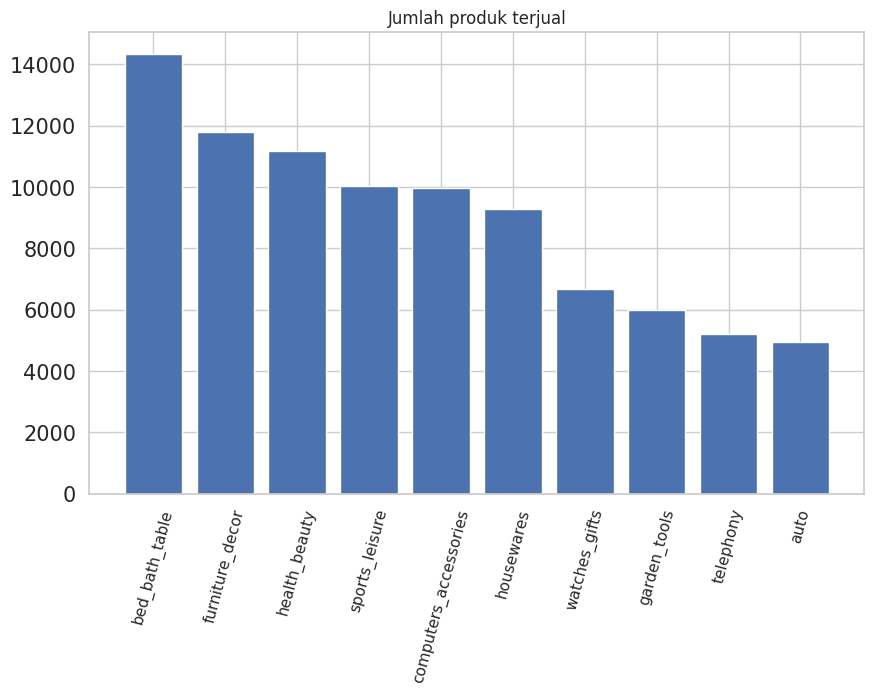

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(top_categories['product_category'][:10], top_categories['order_item_id'][:10])
plt.title('Jumlah produk terjual')
plt.xticks(rotation=75)
plt.yticks(fontsize=15)
plt.show()

**Bed Bath Table** merupakan produk dengan order terbanyak yaitu (14.347) item, disusul oleh **Furniture Decor** (11.800) dan **Health Beauty** (11.189). Menunjukkan bahwa kebutuhan rumah tangga, dekorasi, dan produk kesehatan memiliki popularitas tinggi.  
Perusahaan dapat meningkatkan stok dan variasi produk dalam kategori tersebut untuk memenuhi permintaan yang tinggi.

## Analisis Lanjutan (Opsional)

## Conclusion

1. **Bagaimana distribusi pelanggan berdasarkan wilayah?**  
   Mayoritas pelanggan berasal dari **Sao Paulo (SP), Rio de Janeiro (RJ), dan Minas Gerais (MG)**. Hal ini menunjukkan bahwa konsumen e-commerce lebih banyak berasal dari daerah perkotaan besar. Strategi pemasaran dan distribusi dapat difokuskan pada daerah ini untuk meningkatkan efisiensi dan daya saing.

2. **Kapan waktu puncak penjualan terjadi?**  
   Tren penjualan mengalami kenaikan signifikan dari tahun 2016 hingga 2018, dengan puncak penjualan terjadi pada bulan 11 (November) 2017. Setelah itu, angka penjualan cenderung stabil.

3. **Tipe transaksi apa yang paling sering digunakan?**  
   credit card sebagai metode pembayaran yang paling sering atau paling banyak digunakan, dengan mencapai 76.505 kali pembayaran, menggunakan boleto dengan 19.784 kali pembayaran, kemudian voucher 3.866 pembayaran, debit_card 1.528 pembayaran dan not_defined atau tidak terdefinisi 3 pembayaran.  Ini menunjukkan bahwa mayoritas pelanggan lebih memilih metode pembayaran yang memberikan kemudahan transaksi serta keamanan pembayaran.

4. **Produk apa yang paling laris?**  
   Produk dengan jumlah order terbanyak adalah Bed Bath Table (14.347 item), diikuti oleh Furniture Decor (11.800 item) dan Health Beauty (11.189 item). Hal ini menunjukkan bahwa kebutuhan rumah tangga, dekorasi, dan produk kesehatan memiliki permintaan yang tinggi. Perusahaan dapat meningkatkan variasi produk, stok, dan strategi pemasaran untuk kategori ini, termasuk memberikan promosi khusus pada produk-produk yang paling diminati.

In [54]:
df.to_csv("data_ecommerce.csv", index=False)